Cnn - MNIST  90% -> CNN- fashion_Mnist에 적용 -> 로스그리기 callback

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape
import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.fashion_mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

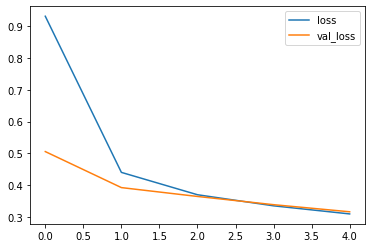

loss =  0.31004151701927185 , val_loss =  0.3167528808116913
313/313 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8840
loss= 0.3293202519416809
acc= 0.8840000033378601
[9 2 1 ... 8 1 5]


In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1))) 
model.add(Conv2D(32, (3, 3), padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=5, verbose=0, batch_size=128, validation_split =0.1,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

acc= 0.9이상으로 도전

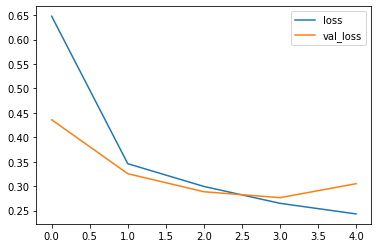

loss =  0.24331028759479523 , val_loss =  0.30512920022010803
313/313 [==============================] - 1s 4ms/step - loss: 0.3255 - accuracy: 0.8894
loss= 0.3254874646663666
acc= 0.8894000053405762
[9 2 1 ... 8 1 5]


In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1))) 
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=5, verbose=0, batch_size=128, validation_split =0.1,
          callbacks=[plot_losses])


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

콘브 2개씩 더 추가했을 때 \
0.884 -> 0.889